## Heuristc algorithm of the histogram of  percentual errors series

##### This heuristic aims to remove from the historgram bin axis , the values with no frequency/signal, also know as sparce matrix, commonly generated when outliers are present. The proposed histogram parametrization is intended to represent how the percentual (no unit) value of the errors are spreads through the series . Sometimes the dataset contains error values way beyond 100% of error, this erro is what we call outliers. This very distant points on the histogram bin axis(x) make lot of useless data(no frequency bins). To remove such noises, we propose to keep only the bins with some frequency after the 100% of error thresholds is achieved. By the end, one should be able to render the same chart using less data points.

##### This is not intent to be the fastest sparcity heurist ever, no numerical approach is used or even numpyarrays,Cython, parallel, etc . By now,  its just a proof of concept about possible optimizations of the matplotlib histogram generated data values using a simple control flow. At the end, two new dynamic arrays are created containing  only the elements with non sparce data( different from 0). 
##### This algorithm could be used for instance to shrink the data size of a JSON containing chart data. Sending less that points enables better software scaling and faster chart rendering/ memory management





### Data used

In [96]:
# mock histogram
frequency_data_y  = [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
histogram_bins_x  = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

print('\nFirst population')
#print(frequency_data_y);print(histogram_bins_x);
print('len(frequency_data): ', len(frequency_data_y))
print('len(histogram_bins): ', len(histogram_bins_x))


# testign with real data generated using matplotlib from a meter source
a = [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065, 1070, 1075, 1080, 1085, 1090, 1095, 1100, 1105, 1110, 1115, 1120, 1125, 1130, 1135, 1140, 1145, 1150, 1155, 1160, 1165, 1170, 1175, 1180, 1185, 1190, 1195, 1200, 1205, 1210, 1215, 1220, 1225, 1230, 1235, 1240, 1245, 1250, 1255, 1260, 1265, 1270, 1275, 1280, 1285, 1290, 1295, 1300, 1305, 1310, 1315, 1320, 1325, 1330, 1335, 1340, 1345, 1350, 1355, 1360, 1365, 1370, 1375, 1380, 1385, 1390, 1395, 1400, 1405, 1410, 1415, 1420, 1425, 1430, 1435, 1440, 1445, 1450, 1455, 1460, 1465, 1470, 1475, 1480, 1485, 1490, 1495, 1500, 1505, 1510, 1515, 1520, 1525, 1530, 1535, 1540, 1545, 1550, 1555, 1560, 1565, 1570, 1575, 1580, 1585, 1590, 1595, 1600, 1605, 1610, 1615, 1620, 1625, 1630, 1635, 1640, 1645, 1650, 1655, 1660, 1665, 1670, 1675, 1680, 1685, 1690, 1695, 1700, 1705, 1710, 1715, 1720, 1725, 1730, 1735, 1740, 1745, 1750, 1755, 1760, 1765, 1770, 1775, 1780, 1785, 1790, 1795, 1800, 1805, 1810, 1815, 1820, 1825, 1830, 1835, 1840, 1845, 1850, 1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]

print('\nSecond population')
#print(a);#print(b)
print('len(frequency_data): ', len(a))
print('len(histogram_bins): ', len(b))



First population
len(frequency_data):  23
len(histogram_bins):  23

Second population
len(frequency_data):  405
len(histogram_bins):  405


### Creating the algorthms

In [97]:
def remove_no_signal_data(bins_list_x, frequency_list):
    only_signal_collection = []
    print('index', '', 'bin_value', '', 'frequency_value')
    for index, value in enumerate(bins_list_x):
        if frequency_list[index] > 0:
            print(index, '    ', value, '           ' ,frequency_list[index] )

In [98]:
remove_no_signal_data(histogram_bins_x, frequency_data_y)

index  bin_value  frequency_value
1      5             1
2      10             2
22      110             1


In [99]:
remove_no_signal_data(b, a)

index  bin_value  frequency_value
3      15             1.0
4      20             1.0
11      55             1.0
324      1620             1.0


### Keep the first 20 bins (100% of the relative error)

In [100]:
# creating the algorithms

def remove_no_signal_data_keep_first_20_bins(bins_list_x, frequency_list):
    non_sparce_bin_collection = []
    non_sparce_frequency_collection = []
    
    print('index', '', 'bin_value', '', 'frequency_value')
    for index, bin_value in enumerate(bins_list_x):

        # always keep the 100% error range
        if index <= 20:
            non_sparce_bin_collection.append(bins_list_x[index])
            non_sparce_frequency_collection.append(frequency_list[index])

        else:
            if frequency_list[index] > 0:
                non_sparce_bin_collection.append(bins_list_x[index])
                non_sparce_frequency_collection.append(frequency_list[index])     

    return [non_sparce_bin_collection, non_sparce_frequency_collection]

         

##### testing on small population

In [101]:
print(histogram_bins_x)
print(frequency_data_y)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
[0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [102]:
result = remove_no_signal_data_keep_first_20_bins(histogram_bins_x, frequency_data_y )
print("non_sparce_frequency_collection: ", result[0])
print("non_sparce_bin_collection: ", result[1])

index  bin_value  frequency_value
non_sparce_frequency_collection:  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110]
non_sparce_bin_collection:  [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


##### testing on larger population

In [103]:
print(a)
print(b)

[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [104]:
result = remove_no_signal_data_keep_first_20_bins(b, a )
print("non_sparce_frequency_collection: ", result[0])
print("non_sparce_bin_collection: ", result[1])

index  bin_value  frequency_value
non_sparce_frequency_collection:  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 1620]
non_sparce_bin_collection:  [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


##### from this last test we can infer the bin value  with 1620% relative erro was probably an outlier/noise

### Visualizing the results


In [105]:
import matplotlib.pyplot as plt

In [116]:
from time import time

def plot_the_histogram(data, bins_size):
    start = time()
    plt.figure(figsize=(15,5))
    values = plt.hist(data, bins_size)

    plt.ylabel('Count')
    plt.xlabel('Bins of {}'.format(bins_size))
    plt.title(r'Histogram')
    plt.show()
    print("Underlying data strucutres")
    print(list(values[0]))
    print(list(values[1]))
    print('Chart generation  took: ', time() - start, 'seconds')
    
def plot_vertical_bar(x,y):
    start = time()
    plt.figure(figsize=(38,12))
    plt.bar(x,y)
    plt.ylabel('Count')
    plt.xlabel('Bins')
    plt.title(r'Histogram')
    plt.show()
    print("Underlying data strucutres")
    print(list(x))
    print(list(y))
    print('Chart generation  took: ', time() - start, 'seconds')
    
    

##### histogram with full series - different bins

[21.250099926276615, 15.558731396070618, 1624.6485747754782, 59.28552038655736]


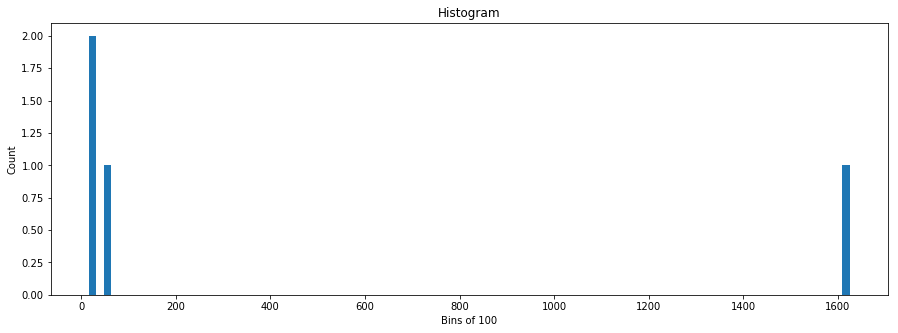

Underlying data strucutres
[2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[15.558731396070618, 31.649629829864693, 47.74052826365877, 63.83142669745284, 79.92232513124691, 96.01322356504099, 112.10412199883505, 128.19502043262912, 144.2859188664232, 160.37681730021728, 176.46771573401136, 192.55861416780542, 208.6495126015995, 224.74041103539358, 240.83130946918763, 256.9222079029817, 273.0131063367758, 289.1040047705699, 305.194903204364, 321.28580163815803, 337.37670007195214, 353.4675985057462, 369.55849693954025, 385.64939537333436, 401

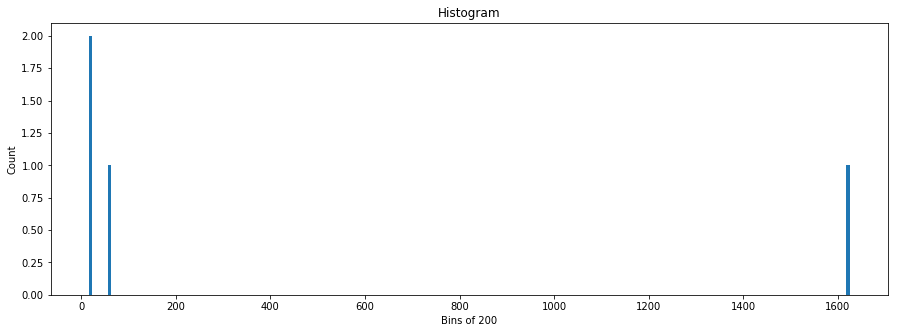

Underlying data strucutres
[2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [117]:
percentual_error0 = [0.21250099926276614, 0.1555873139607062, 16.246485747754782, 0.5928552038655736]
percentual_error = [ i*100 for i in percentual_error0]
print(percentual_error)

#plot_the_histogram(percentual_error, 5)
#plot_the_histogram(percentual_error, 10)
plot_the_histogram(percentual_error, 100) # seems the best value
plot_the_histogram(percentual_error, 200) 
#plot_the_histogram(percentual_error, 1000)
#plot_the_histogram(percentual_error, 2000)



##### histogram with range 

range(0, 2030, 5)


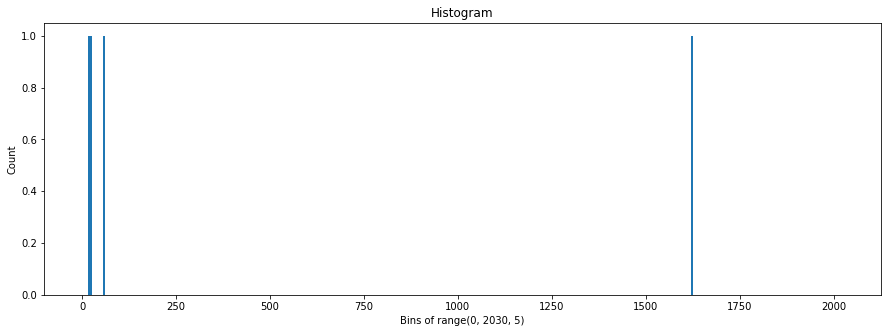

Underlying data strucutres
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [118]:
percentual_error = [0.21250099926276614, 0.1555873139607062, 16.246485747754782, 0.5928552038655736]
try:
    start = time()
    # generating the histogram RANGE - sparce matrix
    max_series = max(percentual_error) * 100  # transforming the max back into %
    hisgogram_x_max = max_series  * 1.25     # expanding the max x axis value by 25%
    bins_size = 5
    bins_range = range(0, int(hisgogram_x_max), int(bins_size))  # cast later to not truncate info
    print(bins_range)
      
    data_collection = [i*100 for i in percentual_error] # transforming the max back into %
    plot_the_histogram(data_collection, bins_range)
    print('\n\nTotal data points :' , 2030/5)

except Exception as e: print(str(e))

#####  histogram using the non-sparce values 

In [119]:
result = remove_no_signal_data_keep_first_20_bins(b, a )
print("non_sparce_frequency_collection: ", result[0])
print("non_sparce_bin_collection: ", result[1])

index  bin_value  frequency_value
non_sparce_frequency_collection:  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 1620]
non_sparce_bin_collection:  [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


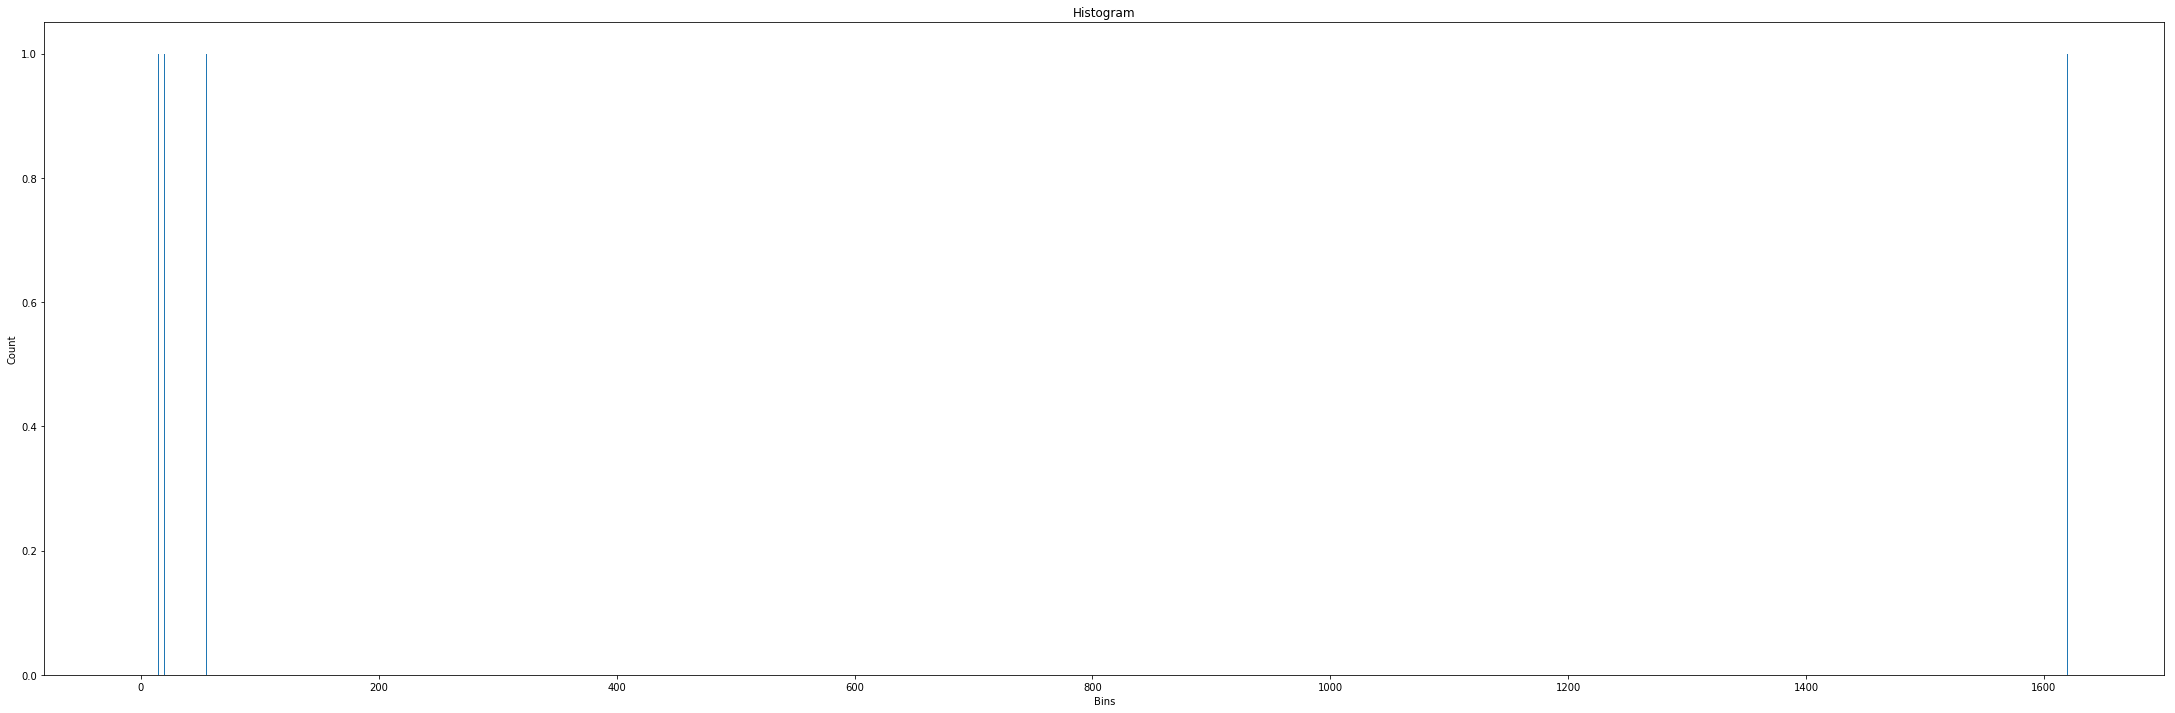

Underlying data strucutres
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 1620]
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Chart generation  took:  0.395031213760376 seconds


In [120]:
plot_vertical_bar(result[0], result[1])
#plot_vertical_bar(result[0][:14], result[1][:14]) # no outliers region

### Initial conclusion
#### From the former figure, using the sparcity algorithm, we could render the same chart using way less data points. On this last example, we convert 406 to 22 data points without losing information. The matplotlib bar handled the null spaces. With this approach, we dont need to save the underlaying data structure into the JSON response. Making it a more convenient option when transporting the data.






#### TODO Next : Check using  javascript frontend libs for loss of information when using the original data and the sparcity algorithm result data